In [1]:
import os

# First of all, we need some VHR data, let's use some COSMO-SkyMed data
path = os.path.join("/home", "data", "DATA", "PRODS", "COSMO", "1st_GEN", "1001512-735097")

In [2]:
# Create logger
import logging

logger = logging.getLogger("eoreader")
logger.setLevel(logging.INFO)

# create console handler and set level to debug
ch = logging.StreamHandler()
ch.setLevel(logging.INFO)

# create formatter
formatter = logging.Formatter('%(message)s')

# add formatter to ch
ch.setFormatter(formatter)

# add ch to logger
logger.addHandler(ch)

In [3]:
from eoreader.reader import Reader

# Create the reader
eoreader = Reader()

In [4]:
# Open your product
prod = eoreader.open(path, remove_tmp=True)
print(f"Acquisition datetime: {prod.datetime}")
print(f"Condensed name: {prod.condensed_name}")

# Please be aware that EOReader will orthorectify your SAR data with SNAP
# Be sure to have your GPT executable in your path

Acquisition datetime: 2020-10-08 22:40:18.446381
Condensed name: 20201008T224018_CSK_HI_DGM


Executing processing graph


.

.

.

.

10%

.

.

.

.

20%

.

.

.

.

30%

.

.

.

.

40%

.

.

.

.

50%

.

.

.

.

60%

.

.

.

.

70%

.

.

.

.

80%

.

.

.

.

90%

 done.


<AxesSubplot:>

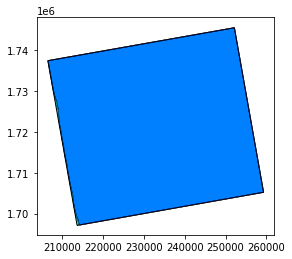

In [5]:
# Open here some more interesting geographical data: extent and footprint
base = prod.extent.plot(color='cyan', edgecolor='black')
prod.footprint.plot(ax=base, color='blue', edgecolor='black', alpha=0.5)

In [6]:
from eoreader.bands import *
from eoreader.env_vars import DEM_PATH

# Set the DEM
os.environ[DEM_PATH] = os.path.join("/home", "data", "DS2", "BASES_DE_DONNEES", "GLOBAL", "COPDEM_30m",
                                    "COPDEM_30m.vrt")

# Select the bands you want to load
bands = [VV, HH, VV_DSPK, HH_DSPK, HILLSHADE, SLOPE]

# Be sure they exist for COSMO-SkyMed sensor:
ok_bands = [band for band in bands if prod.has_band(band)]
print(to_str(ok_bands))  # This product does not have VV band and HILLSHADE band cannot be computed from SAR band

['HH', 'HH_DSPK', 'SLOPE']


In [7]:
# Load those bands as a dict of xarray.DataArray, with a 20m resolution
band_dict = prod.load(ok_bands, resolution=20.)
band_dict[HH]

Executing processing graph


first_line_time metadata value is null
last_line_time metadata value is null
...10%...21%...32%...43%.

.

.

54%

.

.

.65%

.

.

.

76%

...

87%

.

 done.


<xarray.DataArray 'HH' (band: 1, y: 2474, x: 2689)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * x            (x) float64 2.058e+05 2.059e+05 ... 2.596e+05 2.596e+05
  * y            (y) float64 1.746e+06 1.746e+06 ... 1.697e+06 1.697e+06
  * band         (band) int64 1
    spatial_ref  int64 0
Attributes:
    scale_factor:      1.0
    add_offset:        0.0
    long_name:         HH
    sensor:            COSMO-SkyMed
    sensor_id:         CSK
    product_path:      /home/data/DATA/PRODS/COSMO/1st_GEN/1001512-735097
    product_name:      CSKS4_DGM_B_HI_09_HH_RA_FF_20201008224018_20201008224025
    product_filename:  1001512-735097
    product_type:      DGM
    acquisition_date:  20201008T224018
    condensed_name:    20201008T224018_CSK_HI_DGM

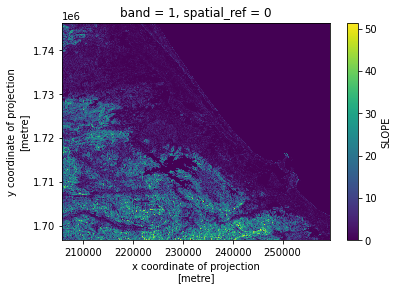

In [8]:
# Plot a subsampled version
band_dict[SLOPE][:, ::10, ::10].plot()

In [9]:
# You can also stack those bands
stack = prod.stack(ok_bands)
stack

<xarray.DataArray 'HH HH_DSPK SLOPE' (z: 3, y: 9897, x: 10755)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[ 0.4255329 ,  0.4255329 ,  0.4255329 , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.4255329 ,  0.4255329 ,  0.4255329 , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.4255329 ,  0.4255329 ,  0.4255329 , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [16.66219   , 16.66219   , 16.66219   , ...,  0.0870695 ,
          0.0870695 ,  0.0870695 ],
        [16.66219   , 16.66219   , 16.66219   , ...,  0.0870695 ,
          0.0870695 ,  0.0870695 ],
        [17.018255  , 17.018255  , 17.018255  , ...,  0.08737368,
          0.08737368,  0.08737368]]], dtype=float32)
Coordinates:
    spatial_ref  int64 0
  * x            (x) float64 2.058e+05 2.058e+05 ... 2.596e+05 2.596e+05
  * y            (y) float64 1.746e+06 1.746e+06 ... 1.697e+06 1.697e+06
  * z            (z) MultiIndex
  - variable     (z) object 'HH' 'HH_DSPK' 'SLOPE'
  - band         (z) int64 1 1 1
Attributes:
    long_name:         HH HH_DSPK SLOPE
    sensor:            COSMO-SkyMed
    sensor_id:         CSK
    product_path:      /home/data/DATA/PRODS/COSMO/1st_GEN/1001512-735097
    product_name:      CSKS4_DGM_B_HI_09_HH_RA_FF_20201008224018_20201008224025
    product_filename:  1001512-735097
    product_type:      DGM
    acquisition_date:  20201008T224018
    condensed_name:    20201008T224018_CSK_HI_DGM

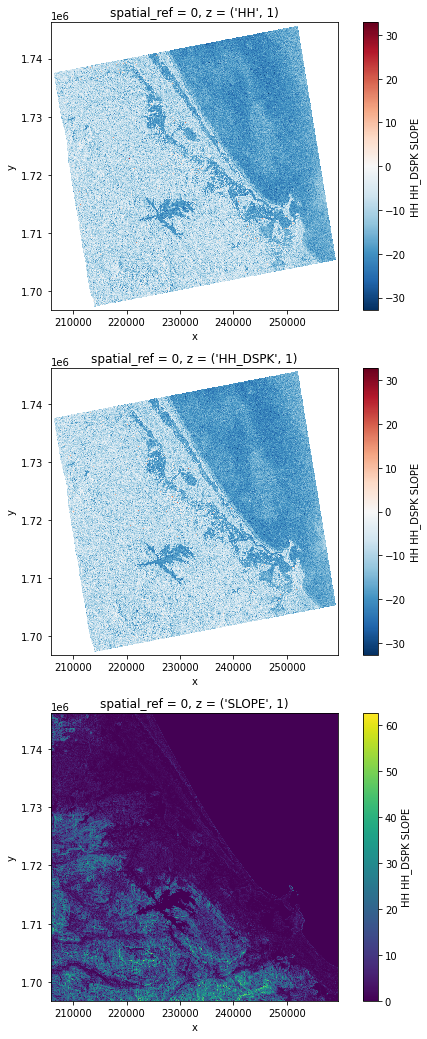

In [10]:
# Plot a subsampled version
import matplotlib.pyplot as plt

nrows = len(stack)
fig, axes = plt.subplots(nrows=nrows, figsize=(3 * nrows, 6 * nrows), subplot_kw={"box_aspect": 1})
for i in range(nrows):
    stack[i, ::10, ::10].plot(x="x", y="y", ax=axes[i])